In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
sns.set_context("talk")

df = pd.read_csv('../data/Final_Monster_Data.csv')
df.head()

,Unnamed: 0,size,type,ac,hp,cr,speed,swim,fly,strength,dex,con,intel,wis,cha,legendary,multiattack
0,0,medium,humanoid,12.0,13,0.25,20,0,50,10,14,10,11,12,11,0,0
1,1,medium,humanoid,12.0,84,9.00,30,0,0,9,14,14,18,12,11,0,0
2,2,large,aberration,17.0,135,10.00,10,40,0,21,9,15,18,15,18,1,1
3,3,huge,monstrosity,15.0,137,9.00,40,0,0,24,10,22,9,13,9,0,0
4,4,medium,undead,21.0,285,23.00,30,0,0,13,16,20,27,21,20,0,0


In [2]:
df = df.drop('Unnamed: 0', axis = 1)

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=42, stratify=df[['type']])

In [4]:
train

,size,type,ac,hp,cr,speed,swim,fly,strength,dex,con,intel,wis,cha,legendary,multiattack
75,large,fiend,17.0,90,4.00,60,0,0,19,15,14,13,12,14,0,0
106,medium,dragon,17.0,32,2.00,30,30,60,17,10,15,12,11,15,0,0
574,large,fiend,14.0,110,8.00,40,0,0,18,13,17,7,14,9,0,0
167,medium,beast,13.0,26,1.00,40,0,0,15,15,14,4,12,6,0,0
716,large,beast,12.0,26,1.00,50,0,0,17,15,13,3,12,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,small,beast,12.0,3,0.00,10,0,60,6,15,10,2,14,7,0,0
611,medium,aberration,16.0,168,16.00,30,0,0,17,12,23,18,12,16,0,0
507,large,monstrosity,13.0,59,3.00,40,0,0,20,12,17,3,12,7,0,1
370,large,beast,12.0,45,2.00,0,40,0,18,13,15,1,10,4,0,0


In [5]:
test

,size,type,ac,hp,cr,speed,swim,fly,strength,dex,con,intel,wis,cha,legendary,multiattack
683,large,giant,15.0,94,7.000,30,0,0,18,13,20,7,9,7,0,0
603,small,fiend,13.0,22,2.000,20,0,40,10,15,12,11,14,8,0,0
381,tiny,aberration,12.0,21,2.000,40,0,0,6,14,13,12,11,10,0,0
524,large,monstrosity,12.0,26,1.000,30,0,50,15,13,12,9,10,11,0,0
473,medium,humanoid,12.0,11,0.250,40,0,0,11,15,12,10,11,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,tiny,beast,11.0,2,0.000,20,20,0,2,11,10,1,8,2,0,0
260,medium,elemental,16.0,85,6.000,15,0,0,20,14,20,11,12,11,0,0
115,large,beast,9.0,15,0.125,50,0,0,16,8,14,2,8,5,0,0
175,medium,fiend,15.0,119,7.000,30,0,0,17,10,19,7,10,9,0,0


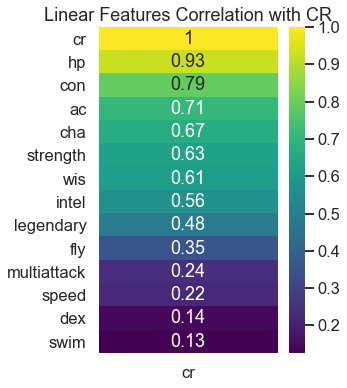

In [6]:
CR_corr = df.corr()[['cr']].sort_values(by='cr', ascending=False)

plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(CR_corr, annot=True, cmap="viridis")
heatmap.set_title('Linear Features Correlation with CR'), plt.savefig('../Images/Lin_FeaturesvsCR.png', bbox_inches='tight');

In [7]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
X_train = train[['hp', 'con', 'ac']]
y_train = train['cr']

linreg.fit(X_train, y_train)

X_test = test[['hp', 'con', 'ac']]
y_test = test['cr']

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

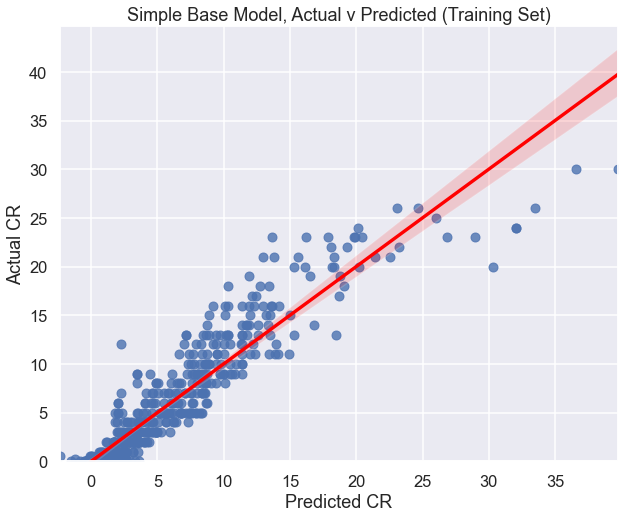

In [8]:
fig, ax = plt.subplots(figsize= (10, 8))
sns.regplot(x = y_train_pred, y = y_train, line_kws={"color": "red"})

plt.title('Simple Base Model, Actual v Predicted (Training Set)')
plt.xlabel('Predicted CR'), plt.ylabel('Actual CR'), plt.ylim(0, None) 
plt.savefig('../Images/Base_model.png', bbox_inches='tight');

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

def get_model(Xtr, ytr, ytr_pred, ytst, ytst_pred):
    import math
    r2_train = r2_score(ytr, ytr_pred)
    r2_test = r2_score(ytst, ytst_pred)
    
    N = len(Xtr)
    p = len(Xtr.columns)
    x = (1-r2_train)
    y = (N-1) / (N-p-1)
    adj_r2 = (1 - (x * y))
    
    rmse_train = math.sqrt(mean_squared_error(ytr, ytr_pred))
    rmse_test = math.sqrt(mean_squared_error(ytst, ytst_pred))
    
    calcs = ["{:.2f}".format(r2_train), "{:.2f}".format(r2_test), "{:.2f}".format(adj_r2), rmse_train, rmse_test, p]
    
    return calcs

In [10]:
model_list = ['R2 Train', 'R2 Test', 'Adjusted R2', 'RMSE Train', 'RMSE Test', 'Num of Variables']
scores = get_model(X_train, y_train, y_train_pred, y_test, y_test_pred)
model_df = pd.DataFrame(scores, model_list).transpose()
model_df

,R2 Train,R2 Test,Adjusted R2,RMSE Train,RMSE Test,Num of Variables
0,0.87,0.87,0.87,2.23501,2.25124,3


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [12]:
# Defining function to make qq-plots
def model_qq(X_train, y_train, formula):
    train_simp = X_train.join(y_train)
    model = ols(formula, train_simp).fit()
    residuals = model.resid
    qq_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
    return qq_plot;

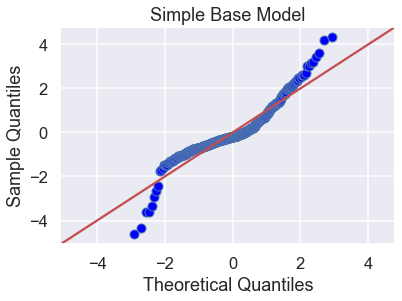

In [13]:
formula = 'cr ~ hp + con + ac'
model_qq(X_train, y_train, formula)
plt.title('Simple Base Model'), plt.savefig('../Images/Base_qqplot.png', bbox_inches='tight');

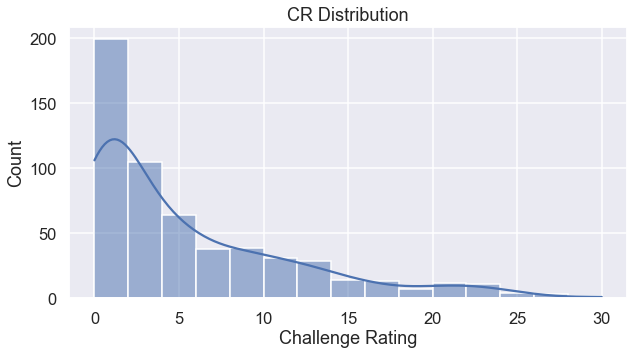

In [14]:
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(train['cr'], kde=True)
plt.title('CR Distribution'), plt.xlabel('Challenge Rating')
plt.savefig('../Images/C_hist.png', bbox_inches='tight');

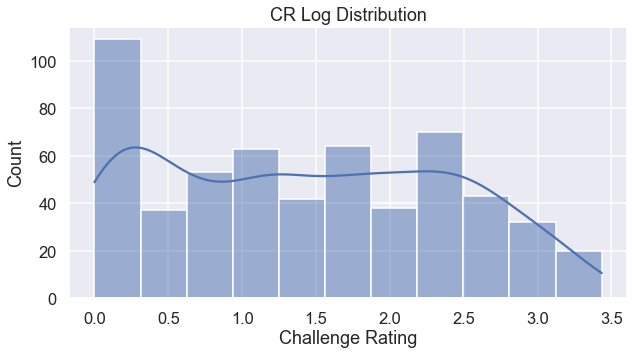

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(np.log1p(train['cr']), kde=True)
plt.title('CR Log Distribution'), plt.xlabel('Challenge Rating'), 
plt.savefig('../Images/Clog_hist.png', bbox_inches='tight');

In [16]:
train['cr'] = np.log1p(train['cr'])
test['cr'] = np.log1p(test['cr'])

<ipython-input-16-df7c3e8bebf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cr'] = np.log1p(train['cr'])
<ipython-input-16-df7c3e8bebf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cr'] = np.log1p(test['cr'])


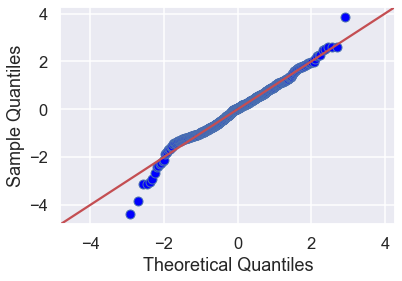

In [17]:
formula = 'cr ~ hp + con + ac'
model_qq(X_train, y_train, formula);

In [18]:
y_train = train['cr']
y_test = test['cr']

linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [19]:
scores = get_model(X_train, y_train, y_train_pred, y_test, y_test_pred)
model_df.loc[len(model_df)] = scores
model_df

,R2 Train,R2 Test,Adjusted R2,RMSE Train,RMSE Test,Num of Variables
0,0.87,0.87,0.87,2.23501,2.25124,3
1,0.72,0.76,0.72,0.514225,0.483629,3


In [20]:
train['cr'] = np.exp(train['cr'])
test['cr'] = np.exp(test['cr'])

<ipython-input-20-5b01d1723df2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cr'] = np.exp(train['cr'])
<ipython-input-20-5b01d1723df2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cr'] = np.exp(test['cr'])


In [21]:
X_train = train[['ac', 'hp', 'strength', 'dex', 'con', 'intel', 'wis', 'cha']]
X_test = test[['ac', 'hp', 'strength', 'dex', 'con', 'intel', 'wis', 'cha']]
y_train = train['cr']
y_test = test['cr']

linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [22]:
scores = get_model(X_train, y_train, y_train_pred, y_test, y_test_pred)
model_df.loc[len(model_df)] = scores
model_df

,R2 Train,R2 Test,Adjusted R2,RMSE Train,RMSE Test,Num of Variables
0,0.87,0.87,0.87,2.23501,2.25124,3
1,0.72,0.76,0.72,0.514225,0.483629,3
2,0.90,0.89,0.90,1.97613,2.0472,8


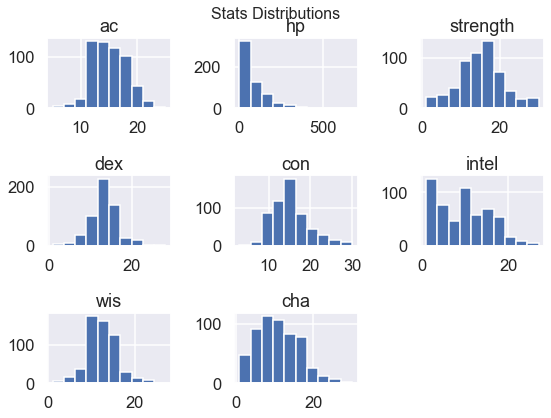

In [23]:
X_train.hist(figsize=(8, 6))
plt.tight_layout()
plt.suptitle('Stats Distributions', size=16), 
plt.savefig('../Images/Stat_Dists.png', bbox_inches='tight');

In [24]:
skew_vars = ['ac', 'hp', 'cha', 'intel']
train[skew_vars] = np.log(train[skew_vars])
test[skew_vars] = np.log(test[skew_vars])

C:\Users\jocel\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
train.head()

,size,type,ac,hp,cr,speed,swim,fly,strength,dex,con,intel,wis,cha,legendary,multiattack
75,large,fiend,2.833213,4.499810,5.0,60,0,0,19,15,14,2.564949,12,2.639057,0,0
106,medium,dragon,2.833213,3.465736,3.0,30,30,60,17,10,15,2.484907,11,2.708050,0,0
574,large,fiend,2.639057,4.700480,9.0,40,0,0,18,13,17,1.945910,14,2.197225,0,0
167,medium,beast,2.564949,3.258097,2.0,40,0,0,15,15,14,1.386294,12,1.791759,0,0
716,large,beast,2.484907,3.258097,2.0,50,0,0,17,15,13,1.098612,12,2.079442,0,0


In [26]:
X_train = train[['ac', 'hp', 'strength', 'dex', 'con', 'intel', 'wis', 'cha', 'speed']]
X_test = test[['ac', 'hp', 'strength', 'dex', 'con', 'intel', 'wis', 'cha', 'speed']]

linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

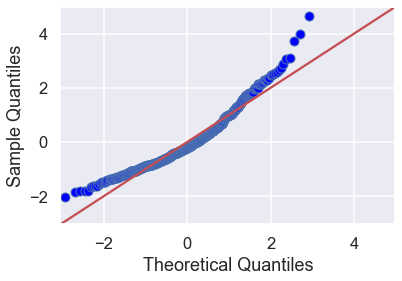

In [27]:
model_qq(X_train, y_train, formula);

In [28]:
scores = get_model(X_train, y_train, y_train_pred, y_test, y_test_pred)
model_df.loc[len(model_df)] = scores
model_df

,R2 Train,R2 Test,Adjusted R2,RMSE Train,RMSE Test,Num of Variables
0,0.87,0.87,0.87,2.23501,2.25124,3
1,0.72,0.76,0.72,0.514225,0.483629,3
2,0.90,0.89,0.90,1.97613,2.0472,8
3,0.78,0.79,0.78,2.93207,2.82026,9


In [29]:
train[skew_vars] = np.exp(train[skew_vars])
test[skew_vars] = np.exp(test[skew_vars])

C:\Users\jocel\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


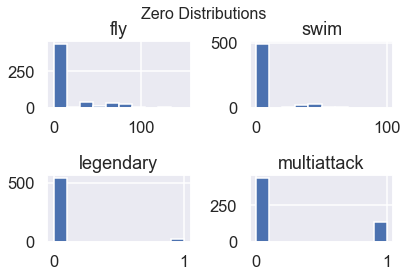

In [30]:
train[['fly', 'swim', 'legendary', 'multiattack']].hist()
plt.tight_layout()
plt.suptitle('Zero Distributions', size=16), 
plt.savefig('../Images/Zero_Dists.png', bbox_inches='tight');

In [31]:
X_train = train.drop(['cr', 'size', 'type'], axis=1)
X_test = test.drop(['cr', 'size', 'type'], axis=1)

linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [32]:
scores = get_model(X_train, y_train, y_train_pred, y_test, y_test_pred)
model_df.loc[len(model_df)] = scores
model_df

,R2 Train,R2 Test,Adjusted R2,RMSE Train,RMSE Test,Num of Variables
0,0.87,0.87,0.87,2.23501,2.25124,3
1,0.72,0.76,0.72,0.514225,0.483629,3
2,0.90,0.89,0.90,1.97613,2.0472,8
3,0.78,0.79,0.78,2.93207,2.82026,9
4,0.90,0.90,0.90,1.94013,1.99122,13


In [33]:
train['size'].unique()

array(['large', 'medium', 'tiny', 'gargantuan', 'small', 'huge'],
      dtype=object)

In [34]:
sizes = ['tiny', 'small', 'medium', 'large', 'huge', 'gargantuan']
int_sizes = [1, 2, 3, 4, 5, 6]

In [35]:
train['size'].replace(to_replace=sizes, value=int_sizes)

75     4
106    3
574    4
167    3
716    4
      ..
213    2
611    3
507    4
370    4
223    4
Name: size, Length: 571, dtype: int64

In [36]:
train['size'] = train['size'].replace(to_replace=sizes, value=int_sizes)
test['size'] = test['size'].replace(to_replace=sizes, value=int_sizes)

<ipython-input-36-fea7c6d67f91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['size'] = train['size'].replace(to_replace=sizes, value=int_sizes)
<ipython-input-36-fea7c6d67f91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['size'] = test['size'].replace(to_replace=sizes, value=int_sizes)


In [37]:
X_train = train.drop(['cr', 'type'], axis=1)
X_test = test.drop(['cr', 'type'], axis=1)

linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [38]:
scores = get_model(X_train, y_train, y_train_pred, y_test, y_test_pred)
model_df.loc[len(model_df)] = scores
model_df

,R2 Train,R2 Test,Adjusted R2,RMSE Train,RMSE Test,Num of Variables
0,0.87,0.87,0.87,2.23501,2.25124,3
1,0.72,0.76,0.72,0.514225,0.483629,3
2,0.90,0.89,0.90,1.97613,2.0472,8
3,0.78,0.79,0.78,2.93207,2.82026,9
4,0.90,0.90,0.90,1.94013,1.99122,13
5,0.91,0.89,0.90,1.93543,2.00389,14


In [39]:
df['type'].value_counts()

humanoid       189
beast          105
fiend           89
monstrosity     87
undead          50
dragon          47
elemental       38
aberration      37
giant           27
construct       24
plant           24
fey             21
celestial        8
swarm            8
ooze             8
Name: type, dtype: int64

In [40]:
pd.get_dummies(train, columns=['type'])

,size,ac,hp,cr,speed,swim,fly,strength,dex,con,...,type_elemental,type_fey,type_fiend,type_giant,type_humanoid,type_monstrosity,type_ooze,type_plant,type_swarm,type_undead
75,4,17.0,90.0,5.00,60,0,0,19,15,14,...,0,0,1,0,0,0,0,0,0,0
106,3,17.0,32.0,3.00,30,30,60,17,10,15,...,0,0,0,0,0,0,0,0,0,0
574,4,14.0,110.0,9.00,40,0,0,18,13,17,...,0,0,1,0,0,0,0,0,0,0
167,3,13.0,26.0,2.00,40,0,0,15,15,14,...,0,0,0,0,0,0,0,0,0,0
716,4,12.0,26.0,2.00,50,0,0,17,15,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2,12.0,3.0,1.00,10,0,60,6,15,10,...,0,0,0,0,0,0,0,0,0,0
611,3,16.0,168.0,17.00,30,0,0,17,12,23,...,0,0,0,0,0,0,0,0,0,0
507,4,13.0,59.0,4.00,40,0,0,20,12,17,...,0,0,0,0,0,1,0,0,0,0
370,4,12.0,45.0,3.00,0,40,0,18,13,15,...,0,0,0,0,0,0,0,0,0,0


In [41]:
train = pd.get_dummies(train, columns=['type'])
test = pd.get_dummies(test, columns=['type'])

In [42]:
X_train = train.drop('cr', axis=1)
X_test = test.drop('cr', axis=1)

linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [43]:
scores = get_model(X_train, y_train, y_train_pred, y_test, y_test_pred)
model_df.loc[len(model_df)] = scores
model_df

,R2 Train,R2 Test,Adjusted R2,RMSE Train,RMSE Test,Num of Variables
0,0.87,0.87,0.87,2.23501,2.25124,3
1,0.72,0.76,0.72,0.514225,0.483629,3
2,0.90,0.89,0.90,1.97613,2.0472,8
3,0.78,0.79,0.78,2.93207,2.82026,9
4,0.90,0.90,0.90,1.94013,1.99122,13
5,0.91,0.89,0.90,1.93543,2.00389,14
6,0.91,0.91,0.91,1.8621,1.85675,29


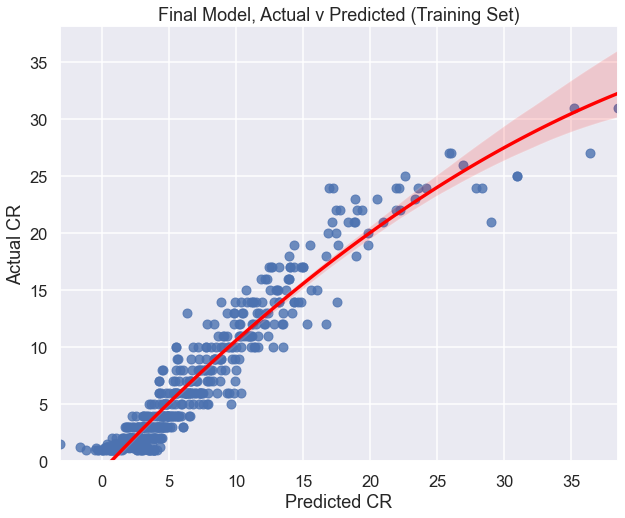

In [44]:
fig, ax = plt.subplots(figsize= (10, 8))
sns.regplot(x = y_train_pred, y = y_train, order=2, line_kws={"color": "red"})
plt.title('Final Model, Actual v Predicted (Training Set)')
plt.xlabel('Predicted CR'), plt.ylabel('Actual CR'), plt.ylim(0, None), 
plt.savefig('../Images/Final_Model.png', bbox_inches='tight');

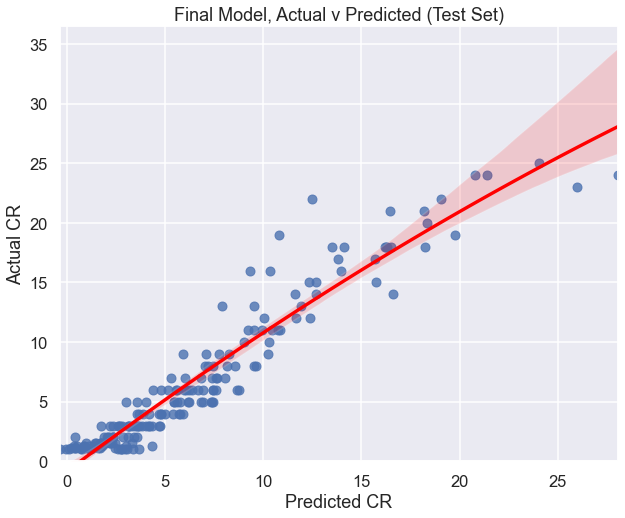

In [45]:
fig, ax = plt.subplots(figsize= (10, 8))
sns.regplot(x = y_test_pred, y = y_test, order=2, line_kws={"color": "red"})

plt.title('Final Model, Actual v Predicted (Test Set)')
plt.xlabel('Predicted CR'), plt.ylabel('Actual CR'), plt.ylim(0, None), 
plt.savefig('../Images/Final_ModelTest.png', bbox_inches='tight');

**-----------------------------------------------------------------------------------------------------------------------**

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg.fit(X_train, y_train)
feat_imps = sorted(zip(rfreg.feature_importances_,
                       X_train.columns),reverse=True)
[i[1] for i in feat_imps[:10]]

['hp',
 'intel',
 'cha',
 'ac',
 'wis',
 'strength',
 'con',
 'dex',
 'multiattack',
 'speed']

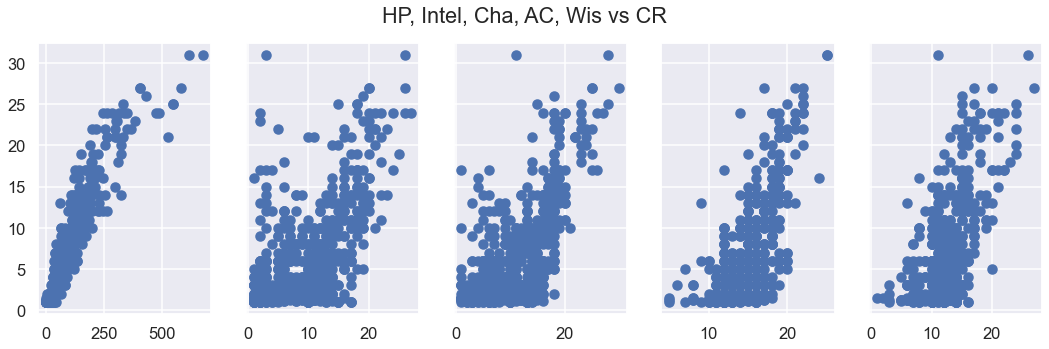

In [47]:
fig, ax = plt.subplots(figsize=(18, 5), nrows=1, ncols=5, sharey=True)
ax[0].scatter('hp', 'cr', data=train)
ax[1].scatter('intel', 'cr', data=train)
ax[2].scatter('cha', 'cr', data=train)
ax[3].scatter('ac', 'cr', data=train)
ax[4].scatter('wis', 'cr', data=train)
plt.suptitle('HP, Intel, Cha, AC, Wis vs CR')
plt.savefig('../Images/CR_vs_stats.png', bbox_inches='tight');

In [48]:
print(X_train.columns)

Index(['size', 'ac', 'hp', 'speed', 'swim', 'fly', 'strength', 'dex', 'con',
       'intel', 'wis', 'cha', 'legendary', 'multiattack', 'type_aberration',
       'type_beast', 'type_celestial', 'type_construct', 'type_dragon',
       'type_elemental', 'type_fey', 'type_fiend', 'type_giant',
       'type_humanoid', 'type_monstrosity', 'type_ooze', 'type_plant',
       'type_swarm', 'type_undead'],
      dtype='object')


In [49]:
Xnew = np.array([5, 19, 190, 40, 0, 80, 18, 17, 21, 18, 15, 17, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]).reshape(-1, 29)
ynew = linreg.predict(Xnew)
print(ynew.astype(int))

[14]


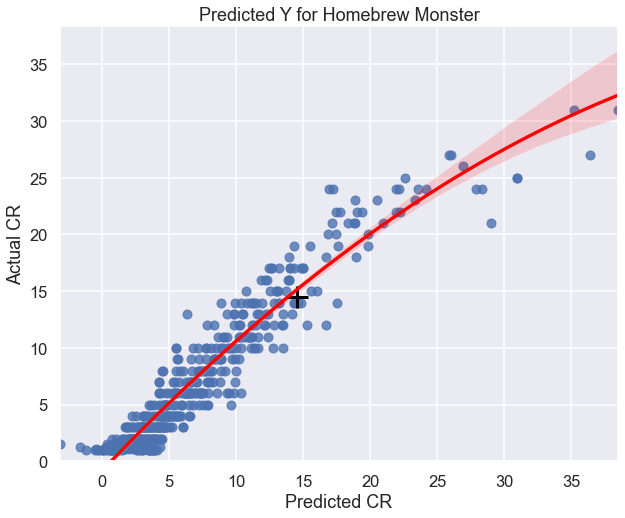

In [50]:
fig, ax = plt.subplots(figsize= (10, 8))
sns.regplot(x = y_train_pred, y = y_train, order=2, line_kws={"color": "red"})
sns.scatterplot(x=ynew, y=ynew, s=500, color="black", marker="+", linewidth=3)
plt.title('Predicted Y for Homebrew Monster')
plt.xlabel('Predicted CR'), plt.ylabel('Actual CR'), plt.ylim(0, None),
plt.savefig('../Images/CR_prediction.png', bbox_inches='tight');